AttributeError: Rectangle.set() got an unexpected keyword argument 'legend'

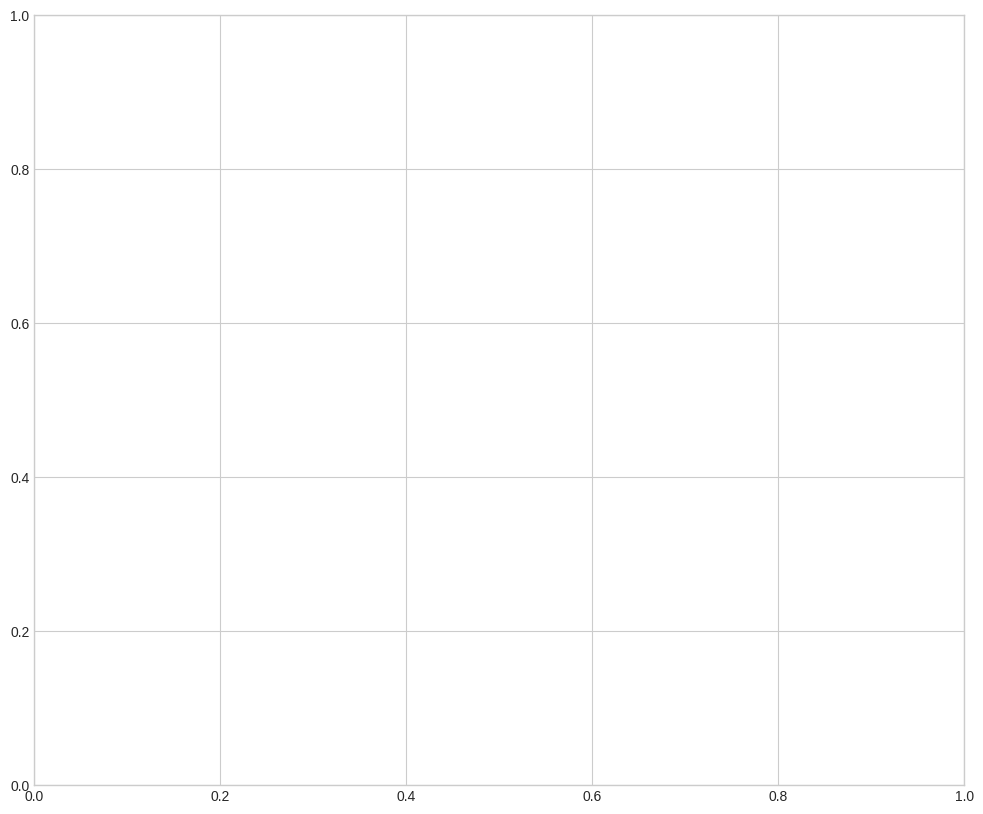

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/kaggle/input/ai-impact-on-job-market-20242030/ai_job_trends_dataset.csv")

df.dropna(subset=['Job Title', 'Automation Risk (%)'], inplace=True)
automation_risk_by_industry = df.groupby('Job Title')['Automation Risk (%)'].mean().sort_values(ascending=False).tail(20)

custom_palette = sns.light_palette(
    "#e67cb9",
    n_colors=len(automation_risk_by_industry),
    reverse=True
)

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 10))

ax = sns.barplot(
    x=automation_risk_by_industry.values,
    y=automation_risk_by_industry.index,
    palette=custom_palette,
    hue=automation_risk_by_industry.index,
    legend=False
)

ax.set_title('Lavori a meno rischio di automazione', fontsize=18, pad=20)
ax.set_xlabel('Rischio Medio di Automazione (%)', fontsize=14)
ax.set_ylabel('Settore Industriale', fontsize=14)

plt.xlim(0, automation_risk_by_industry.values.max() * 1.1) # Spazio per le etichette
plt.tight_layout()
plt.savefig("Lavori_Meno_Rischio_Automazione.png")
plt.show()